In [1]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from prunedcv import PrunedCV
import seaborn as sns
import numpy as np

/Users/piotrgabrys/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = fetch_california_housing()
x = data['data']
y = data['target']

In [3]:
model = LGBMRegressor()

In [6]:
def obejctive_standard(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 1_000)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return - np.mean(cross_val_score(model, x, y, cv=12, scoring='neg_mean_squared_error'))

study_standard = optuna.create_study()

study_standard.optimize(obejctive_standard, timeout=120)

[I 2019-03-11 21:01:02,607] Finished a trial resulted in value: 0.8025130242016553. Current best value is 0.8025130242016553 with parameters: {'n_estimators': 97, 'num_leaves': 48, 'colsample_bytree': 0.7498877786681608, 'learning_rate': 0.006552764453881509, 'max_depth': 885}.
[I 2019-03-11 21:01:03,109] Finished a trial resulted in value: 0.38741263707897566. Current best value is 0.38741263707897566 with parameters: {'n_estimators': 30, 'num_leaves': 23, 'colsample_bytree': 0.7892018797365447, 'learning_rate': 0.17383471931488398, 'max_depth': 618}.
[I 2019-03-11 21:01:03,845] Finished a trial resulted in value: 0.8773111253533822. Current best value is 0.38741263707897566 with parameters: {'n_estimators': 30, 'num_leaves': 23, 'colsample_bytree': 0.7892018797365447, 'learning_rate': 0.17383471931488398, 'max_depth': 618}.
[I 2019-03-11 21:01:04,312] Finished a trial resulted in value: 0.4782342051276622. Current best value is 0.38741263707897566 with parameters: {'n_estimators': 30

[I 2019-03-11 21:01:49,817] Finished a trial resulted in value: 0.9508871356669814. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num_leaves': 53, 'colsample_bytree': 0.877969611255744, 'learning_rate': 0.0992634370001351, 'max_depth': 541}.
[I 2019-03-11 21:01:51,480] Finished a trial resulted in value: 0.34878559534846826. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num_leaves': 53, 'colsample_bytree': 0.877969611255744, 'learning_rate': 0.0992634370001351, 'max_depth': 541}.
[I 2019-03-11 21:01:53,160] Finished a trial resulted in value: 0.3619060968842904. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num_leaves': 53, 'colsample_bytree': 0.877969611255744, 'learning_rate': 0.0992634370001351, 'max_depth': 541}.
[I 2019-03-11 21:01:54,129] Finished a trial resulted in value: 0.37698776309936816. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'nu

[I 2019-03-11 21:02:34,592] Finished a trial resulted in value: 0.37507868030995883. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num_leaves': 53, 'colsample_bytree': 0.877969611255744, 'learning_rate': 0.0992634370001351, 'max_depth': 541}.
[I 2019-03-11 21:02:36,657] Finished a trial resulted in value: 0.4407310956992487. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num_leaves': 53, 'colsample_bytree': 0.877969611255744, 'learning_rate': 0.0992634370001351, 'max_depth': 541}.
[I 2019-03-11 21:02:38,510] Finished a trial resulted in value: 1.193130595336014. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num_leaves': 53, 'colsample_bytree': 0.877969611255744, 'learning_rate': 0.0992634370001351, 'max_depth': 541}.
[I 2019-03-11 21:02:39,309] Finished a trial resulted in value: 0.47781017429176864. Current best value is 0.33888558202091174 with parameters: {'n_estimators': 88, 'num

For probabilistic search methods like Bayesian Optimization you should use probabilistic pruning:

In [7]:
prun = PrunedCV(12, 0.1, probabilistic_prun=True)

def objective_pruned(trial):

    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 1_000)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return prun.cross_val_score(model, x, y)

study_pruned = optuna.create_study()

study_pruned.optimize(objective_pruned, timeout=120)

[I 2019-03-11 21:03:34,341] Finished a trial resulted in value: 1.3292882724049582. Current best value is 1.3292882724049582 with parameters: {'n_estimators': 19, 'num_leaves': 43, 'colsample_bytree': 0.9399907161616903, 'learning_rate': 0.0018690330534205835, 'max_depth': 139}.
[I 2019-03-11 21:03:34,546] Finished a trial resulted in value: 1.3539567509263288. Current best value is 1.3292882724049582 with parameters: {'n_estimators': 19, 'num_leaves': 43, 'colsample_bytree': 0.9399907161616903, 'learning_rate': 0.0018690330534205835, 'max_depth': 139}.
[I 2019-03-11 21:03:37,646] Finished a trial resulted in value: 1.302774602371681. Current best value is 1.302774602371681 with parameters: {'n_estimators': 87, 'num_leaves': 87, 'colsample_bytree': 0.7284089014763375, 'learning_rate': 0.0006535332503506664, 'max_depth': 259}.
[I 2019-03-11 21:03:39,067] Finished a trial resulted in value: 1.2246681380577564. Current best value is 1.2246681380577564 with parameters: {'n_estimators': 33,

[I 2019-03-11 21:03:49,047] Finished a trial resulted in value: 0.37791240617363714. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:03:49,258] Finished a trial resulted in value: 1.0407583476711622. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:03:49,869] Finished a trial resulted in value: 0.34660222407884267. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:03:50,037] Finished a trial resulted in value: 0.349977852202508. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49

[I 2019-03-11 21:03:55,705] Finished a trial resulted in value: 0.36919641073751674. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:03:55,947] Finished a trial resulted in value: 0.35985134357154563. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:03:56,030] Finished a trial resulted in value: 0.8150582310306883. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:03:56,188] Finished a trial resulted in value: 0.5200299827699927. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 4

[I 2019-03-11 21:04:01,571] Finished a trial resulted in value: 0.5443034280294836. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:01,990] Finished a trial resulted in value: 0.38008541753421876. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:02,373] Finished a trial resulted in value: 0.3563158415987411. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:02,590] Finished a trial resulted in value: 0.5714191193769601. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49

[I 2019-03-11 21:04:11,690] Finished a trial resulted in value: 0.39188040326883133. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:11,985] Finished a trial resulted in value: 0.35382391629856474. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:12,167] Finished a trial resulted in value: 1.0954323159913737. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:12,566] Finished a trial resulted in value: 0.4397278975764176. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 4

[I 2019-03-11 21:04:21,750] Finished a trial resulted in value: 0.44730652759731976. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:21,919] Finished a trial resulted in value: 0.3490324359993981. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:22,154] Finished a trial resulted in value: 0.3777901351997789. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:22,353] Finished a trial resulted in value: 0.4355565038814277. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49

[I 2019-03-11 21:04:32,230] Finished a trial resulted in value: 0.3768263600541317. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:32,677] Finished a trial resulted in value: 0.3765818054983744. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:32,972] Finished a trial resulted in value: 0.8375395912825163. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:33,315] Finished a trial resulted in value: 0.39186860601080403. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49

[I 2019-03-11 21:04:47,438] Finished a trial resulted in value: 0.35202742086192224. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:48,062] Finished a trial resulted in value: 0.5050407038323971. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:48,750] Finished a trial resulted in value: 0.38530630841714203. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 49, 'num_leaves': 92, 'colsample_bytree': 0.9071162195612112, 'learning_rate': 0.14397931071399334, 'max_depth': 600}.
[I 2019-03-11 21:04:49,095] Finished a trial resulted in value: 0.41292475188845607. Current best value is 0.34431727727673384 with parameters: {'n_estimators': 

[I 2019-03-11 21:05:03,427] Finished a trial resulted in value: 0.3576232627108682. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:04,148] Finished a trial resulted in value: 0.447538189510738. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:04,835] Finished a trial resulted in value: 0.5877251081563715. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:05,286] Finished a trial resulted in value: 0.3882069251537188. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 

[I 2019-03-11 21:05:15,656] Finished a trial resulted in value: 0.37670942135595836. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:16,446] Finished a trial resulted in value: 0.4016204394757548. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:16,844] Finished a trial resulted in value: 0.3616524667303504. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:17,860] Finished a trial resulted in value: 0.3416750669614012. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84

[I 2019-03-11 21:05:27,346] Finished a trial resulted in value: 0.4636588804387277. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:27,713] Finished a trial resulted in value: 0.3815072626345173. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:28,485] Finished a trial resulted in value: 0.3734434054391365. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84, 'num_leaves': 86, 'colsample_bytree': 0.9204999724515276, 'learning_rate': 0.14501629968840887, 'max_depth': 991}.
[I 2019-03-11 21:05:28,881] Finished a trial resulted in value: 0.39040104860446045. Current best value is 0.34082967747384174 with parameters: {'n_estimators': 84

In [8]:
df_prun = study_pruned.trials_dataframe()
df_stan = study_standard.trials_dataframe()

In [9]:
df_prun['time'] = (df_prun.datetime_start - df_prun.datetime_start.min()).astype('int') / 1_000_000_000
df_stan['time'] = (df_stan.datetime_start - df_stan.datetime_start.min()).astype('int') / 1_000_000_000

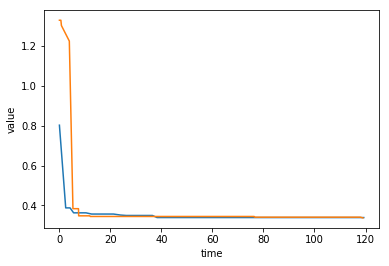

In [10]:
sns.lineplot(x=df_stan.time, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.time, y=df_prun.value.cummin());

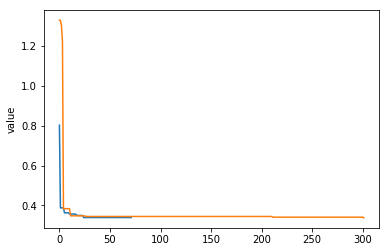

In [11]:
sns.lineplot(x=df_stan.index, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.index, y=df_prun.value.cummin());

In [12]:
df_prun.shape[0] / df_stan.shape[0]

4.194444444444445